<font face='Ubuntu' size = 4>

# The experiments on the Noisy images
## Gradient orientation histogram
The noise will bring big error in integral method

The HoG estimation when (1.0) is  1 in 0.0256s
The HoG estimation when (2.0) is  2 in 0.0254s
The HoG estimation when (3.0) is  3 in 0.0202s
The HoG estimation when (4.0) is  4 in 0.0352s
The HoG estimation when (5.0) is  5 in 0.0198s
The HoG estimation when (6.0) is  6 in 0.0198s
The HoG estimation when (7.0) is  7 in 0.0198s
The HoG estimation when (8.0) is  8 in 0.0354s
The HoG estimation when (9.0) is  9 in 0.0277s
The HoG estimation when (10.0) is 10 in 0.0222s


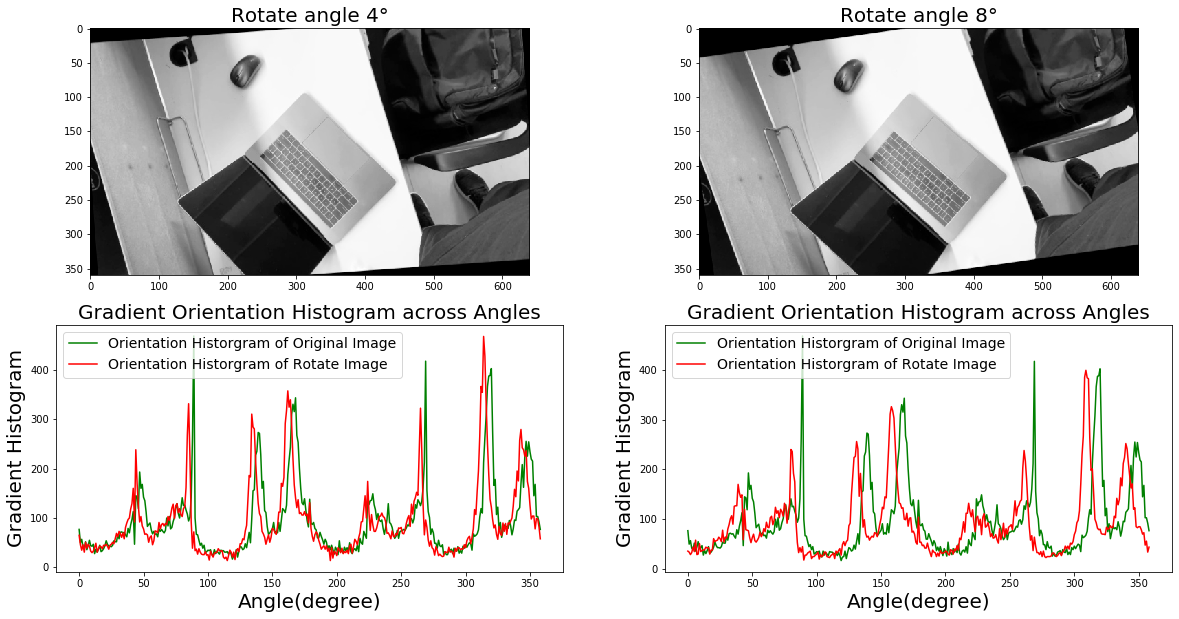

In [9]:
import matplotlib.pyplot as plt
from Utils_orientation import angle_cal, create_images
from Utils_plot import plot_double_result

import time
import numpy as np
import cv2
import torch

from utils.datasets import letterbox
from utils.models import *
from Utils_orientation import *

# Image path
base_file = 'figures/71.jpg'
rotate_file = 'figures/99.jpg'

img_orig = cv2.imread(base_file)
img_rotate = cv2.imread(rotate_file)
(h, w) = img_orig.shape[:2]
center = (w / 2, h / 2)
img_base = cv2.cvtColor(img_orig, cv2.COLOR_BGR2GRAY)
img_rotate = cv2.cvtColor(img_rotate, cv2.COLOR_BGR2GRAY)

bins = 360
thres = 50
# The translation angles
angle_limits = 15

angle_estimation = []

def HoG_cal(img, mag_thres = 50, bin_num = 360):
    '''
    Calculation the histogram of gradients direction
    '''
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Cal the magnitude and angle of Gradients
    sobelx=cv2.Sobel(img, cv2.CV_64F, dx=1, dy=0)
    sobely=cv2.Sobel(img, cv2.CV_64F, dx=0, dy=1)
    gradient = np.arctan2(sobely, sobelx) * 180 / np.pi
    magnitude = np.sqrt(sobelx ** 2 + sobely ** 2)

    # Set one Threshold which discard the low identity gradient
    #mag_thres = magnitude.max() / 2
    gradient = (magnitude > mag_thres) * gradient
    gradient = (gradient < 0) * 360 + gradient
    hist, bins = np.histogram(gradient, bin_num)
    hist = hist[1:]
    
    return hist

plt.figure(figsize=(20, 10))
for rotate_angle in range(1, 11):
    M = cv2.getRotationMatrix2D(center, rotate_angle, 1)
    img_rotate = cv2.warpAffine(img_base, M, (w, h))
    start = time.time()

    hist_base = HoG_cal(img_base, mag_thres= thres, bin_num= bins)
    hist_rotate = HoG_cal(img_rotate, mag_thres= thres, bin_num= bins)
    if rotate_angle % 4 == 0 and True:
        plot_index = rotate_angle / 4
        plt.subplot(2, 2, plot_index)
        plt.imshow(img_rotate, cmap= 'Greys_r')
        plt.title("Rotate angle " + str(rotate_angle) + "°", fontsize = 20)
        plt.subplot(2, 2, plot_index + 2) 
        plt.plot(hist_base, 'g', label = 'Orientation Historgram of Original Image')
        plt.plot(hist_rotate, 'r', label = 'Orientation Historgram of Rotate Image')
        plt.legend(fontsize = 14)
        plt.xlabel('Angle(degree)', fontsize = 20)
        plt.ylabel('Gradient Histogram', fontsize = 20)
        plt.title("Gradient Orientation Histogram across Angles", fontsize = 20)
    # Using HoG to calculate the angel
    angle = angle_HoG(hist_base, hist_rotate, limits = angle_limits)
    print("The HoG estimation when ({0:.1f}) is {1:2d} in {2:.4f}s" \
        .format(rotate_angle ,angle, time.time() - start))
plt.show()

The HoG estimation when (1.0) is  0 in 0.0323s
The HoG estimation when (2.0) is  0 in 0.0248s
The HoG estimation when (3.0) is  0 in 0.0244s
The HoG estimation when (4.0) is  3 in 0.0446s
The HoG estimation when (5.0) is  6 in 0.0239s
The HoG estimation when (6.0) is  6 in 0.0256s
The HoG estimation when (7.0) is  6 in 0.0242s
The HoG estimation when (8.0) is  8 in 0.0452s
The HoG estimation when (9.0) is  9 in 0.0256s
The HoG estimation when (10.0) is  9 in 0.0243s


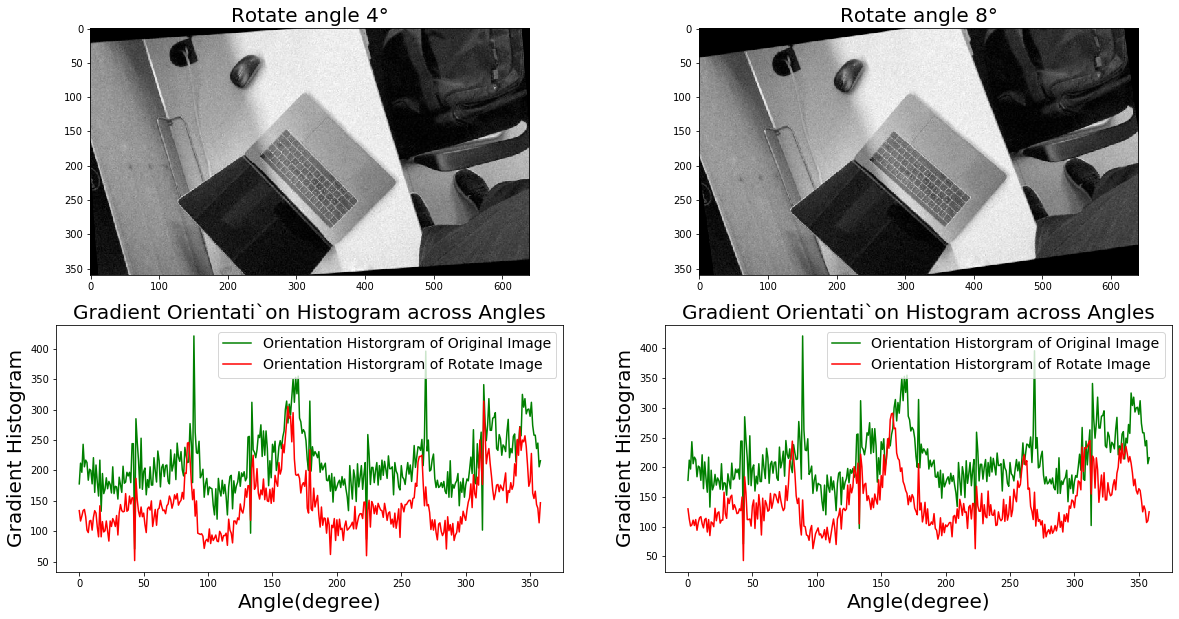

In [10]:
import matplotlib.pyplot as plt
from Utils_orientation import angle_cal, create_images
from Utils_plot import plot_double_result

import time
import numpy as np
import cv2
import torch

from utils.datasets import letterbox
from utils.models import *
from Utils_orientation import *

# Image path
base_file = 'figures/71_noise_8.jpg'
rotate_file = 'figures/99.jpg'

img_base = cv2.imread(base_file)
img_rotate = cv2.imread(rotate_file)
(h, w) = img_base.shape[:2]
center = (w / 2, h / 2)
bins = 360
thres = 50
# The translation angles
angle_limits = 15

angle_estimation = []

plt.figure(figsize=(20, 10))
for rotate_angle in range(1, 11):
    M = cv2.getRotationMatrix2D(center, rotate_angle, 1)
    img_rotate = cv2.warpAffine(img_base, M, (w, h))
    start = time.time()

    hist_base = HoG_cal(img_base, mag_thres= thres, bin_num= bins)
    hist_rotate = HoG_cal(img_rotate, mag_thres= thres, bin_num= bins)
    if rotate_angle % 4 == 0 and True:
        plot_index = rotate_angle / 4
        plt.subplot(2, 2, plot_index)
        plt.imshow(img_rotate, cmap= 'Greys_r')
        plt.title("Rotate angle " + str(rotate_angle) + "°", fontsize = 20)
        plt.subplot(2, 2, plot_index + 2) 
        plt.plot(hist_base, 'g', label = 'Orientation Historgram of Original Image')
        plt.plot(hist_rotate, 'r', label = 'Orientation Historgram of Rotate Image')
        plt.legend(fontsize = 14)
        #plt.ylim((0, 800))
        plt.xlabel('Angle(degree)', fontsize = 20)
        plt.ylabel('Gradient Histogram', fontsize = 20)
        plt.title("Gradient Orientati`on Histogram across Angles", fontsize = 20)
    # Using HoG to calculate the angel
    angle = angle_HoG(hist_base, hist_rotate, limits = angle_limits)
    print("The HoG estimation when ({0:.1f}) is {1:2d} in {2:.4f}s" \
        .format(rotate_angle ,angle, time.time() - start))
plt.show()

The HoG estimation when (1.0) is  1 in 0.0333s
The HoG estimation when (2.0) is  2 in 0.0227s
The HoG estimation when (3.0) is  3 in 0.0219s
The HoG estimation when (4.0) is  4 in 0.0410s
The HoG estimation when (5.0) is  5 in 0.0221s
The HoG estimation when (6.0) is  6 in 0.0220s
The HoG estimation when (7.0) is  7 in 0.0220s
The HoG estimation when (8.0) is  8 in 0.0404s
The HoG estimation when (9.0) is  9 in 0.0278s
The HoG estimation when (10.0) is 10 in 0.0225s


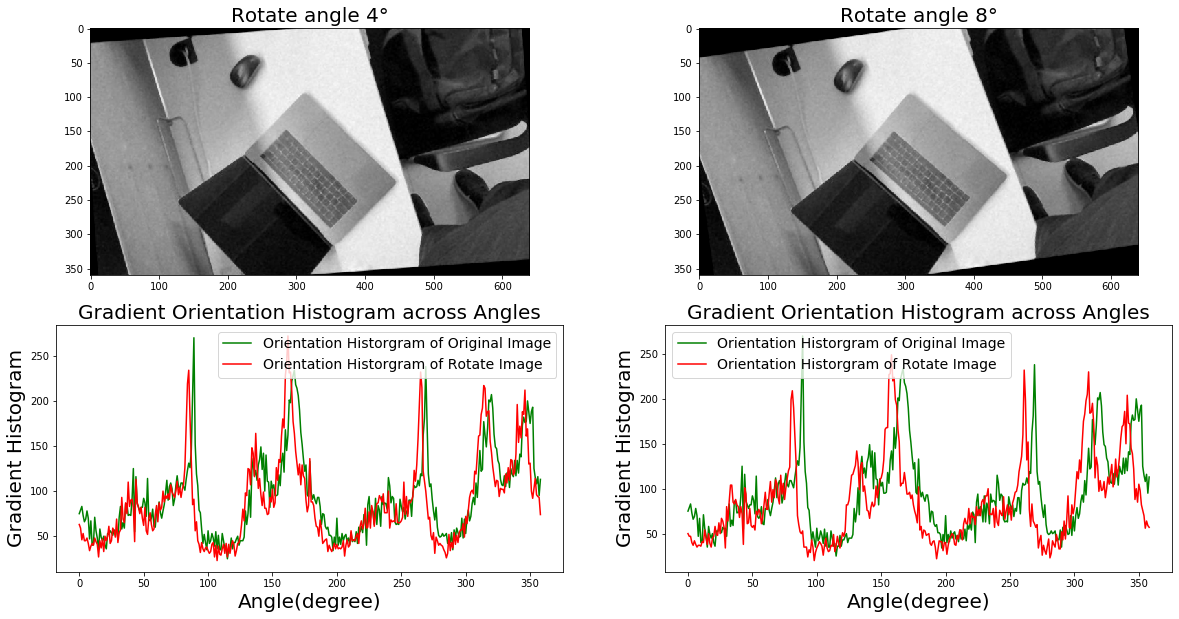

In [11]:
import matplotlib.pyplot as plt
from Utils_orientation import angle_cal, create_images
from Utils_plot import plot_double_result

import time
import numpy as np
import cv2
import torch

from utils.datasets import letterbox
from utils.models import *
from Utils_orientation import *

# Image path
base_file = 'figures/71__8.jpg'
rotate_file = 'figures/99.jpg'

img_base = cv2.imread(base_file)
img_rotate = cv2.imread(rotate_file)
(h, w) = img_base.shape[:2]
center = (w / 2, h / 2)


bins = 360
thres = 50
# The translation angles
angle_limits = 15

angle_estimation = []

plt.figure(figsize=(20, 10))
for rotate_angle in range(1, 11):
    M = cv2.getRotationMatrix2D(center, rotate_angle, 1)
    img_rotate = cv2.warpAffine(img_base, M, (w, h))
    start = time.time()

    hist_base = HoG_cal(img_base, mag_thres= thres, bin_num= bins)
    hist_rotate = HoG_cal(img_rotate, mag_thres= thres, bin_num= bins)
    if rotate_angle % 4 == 0 and True:
        plot_index = rotate_angle / 4
        plt.subplot(2, 2, plot_index)
        plt.imshow(img_rotate, cmap= 'Greys_r')
        plt.title("Rotate angle " + str(rotate_angle) + "°", fontsize = 20)
        plt.subplot(2, 2, plot_index + 2) 
        plt.plot(hist_base, 'g', label = 'Orientation Historgram of Original Image')
        plt.plot(hist_rotate, 'r', label = 'Orientation Historgram of Rotate Image')
        plt.legend(fontsize = 14)
        #plt.ylim((0, 800))
        plt.xlabel('Angle(degree)', fontsize = 20)
        plt.ylabel('Gradient Histogram', fontsize = 20)
        plt.title("Gradient Orientation Histogram across Angles", fontsize = 20)
    # Using HoG to calculate the angel
    angle = angle_HoG(hist_base, hist_rotate, limits = angle_limits)
    print("The HoG estimation when ({0:.1f}) is {1:2d} in {2:.4f}s" \
        .format(rotate_angle ,angle, time.time() - start))
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from Utils_plot import plot_hist

print(cv2.__version__)
np.set_printoptions(suppress=True)

img = cv2.imread('figures/99.jpg')
img_rotate = cv2.imread('figures/71.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rotate = cv2.cvtColor(img_rotate, cv2.COLOR_BGR2GRAY)

hist = HoG_cal(img)
hist_r = HoG_cal(img_rotate)
plt.plot(hist, 'r')
plt.plot(hist_r, 'g')
plt.show()

In [ ]:
mode_list = ["SIFT", "ORB"]

sift_error = np.array([])
orb_error = np.array([])

for mode in mode_list:
    for rotate_angle in np.arange(1.0, 11.0, 0.1):
        M = cv2.getRotationMatrix2D(center, rotate_angle, 1)
        img_rotate = cv2.warpAffine(img_base, M, (w, h))
        
        fd_median, fd_mean, exe_time = angle_cal(img_orig, img_rotate, mode, show_results= False)
        
        #print("FD Rotate({0:3.1f}):mean({1:5.3f}), median({2:5.3f}) in {3:.3f}"\
        #     .format(rotate_angle, fd_mean, fd_median, exe_time))
        
        # Gradients Method
        hist_base = HoG_cal(img_base, mag_thres= thres, bin_num= bins)
        hist_rotate = HoG_cal(img_rotate, mag_thres= thres, bin_num= bins)
        
        angle = angle_HoG(hist_base, hist_rotate, limits = angle_limits)
        print("The HoG estimation when ({0:.1f}) is {1:2d}" \
            .format(rotate_angle ,angle))
        
        if mode == "SIFT":
            sift_error = np.append(sift_error, np.abs(fd_mean - rotate_angle))
        elif mode == "ORB":
            orb_error = np.append(orb_error, np.abs(fd_mean - rotate_angle))

plt.figure(figsize=(16, 8))
index_error = np.arange(1.0, 11.0, 0.1)
plt.plot(index_error, sift_error, 'r', label = 'SIFT error')
plt.plot(index_error, orb_error, 'g', label = 'ORB error')
plt.legend(fontsize = 14)
plt.xlabel('Real rotation angle (degree)' , fontsize = 16)
plt.ylabel('Absolute error (degree)', fontsize = 16)
plt.xticks(np.arange(1.0, 11.0, 0.5))
plt.savefig('output/siftorb_error.png')
plt.show()

<font face='Ubuntu' size = 4>

## Harris corner detection
Detect corner using the harris method

In [ ]:
filename = 'figures/71.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst, None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()